# Envelope of the Sinc Function

In [2]:
import DistExampB as db
import sympy as sp
from matplotlib import pyplot as plot
from matplotlib.colors import hsv_to_rgb

from math import pi
from numpy import sinc
from sympy import Symbol

from LocUtil import Grid1
from Map import LogRatio
from Sinc import SincApprox

### Setup

In [3]:
xSym = Symbol('x')
zSym = Symbol('z')

In [4]:
map_ = LogRatio(xSym,zSym, (0,2))
X2Z = map_.Forward
Z2X = map_.Inverse
map_.forSym

log(x/(2 - x))

## Construct the Envelope of a Sinc-Approximation

In [33]:
nPlot = 201
h = 1/2
zRange = (-3,3)

In [7]:
def TailEnv(z,zk,h):
	if abs((z - zk) / h) < 0.5:
		result = sinc((z - zk) / h)
	else:
		result = h / (pi * abs(z - zk))
	  
	return result

In [8]:
SincBase = lambda z,zk,h: sinc((z - zk) / h)

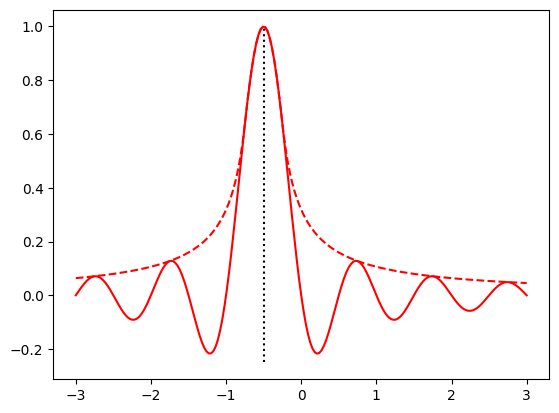

In [38]:
zGrid = Grid1(*zRange, nPlot)
sincGrid = tuple(SincBase(z,-h,h) for z in zGrid)
plot.plot(zGrid,sincGrid, c='red')

plot.plot([-h,-h],[-0.25,1], ':', c='black')

tailGrid = tuple(TailEnv(z,-h,h) for z in zGrid)
plot.plot(zGrid,tailGrid, '--', c='red')

In [39]:
color0 = tuple(hsv_to_rgb((1 - 1/12, 1, 1)))
color1 = tuple(hsv_to_rgb((1/12, 1, 1)))
color2 = tuple(hsv_to_rgb((1/2, 1, 1)))
color0, color1, color2

((1.0, 0.0, 0.5), (1.0, 0.5, 0.0), (0.0, 1.0, 1.0))

Text(0.5, 0, 'z')

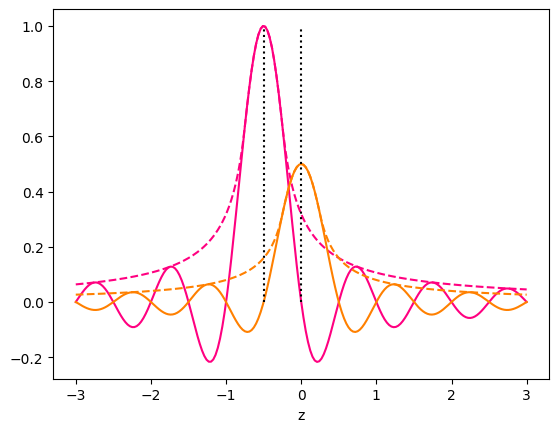

In [40]:
# point at z = -1
tailGridM = tuple(TailEnv(z,-h,h) for z in zGrid)
plot.plot(zGrid,tailGridM, '--', c=color0)

sincGridM = tuple(SincBase(z,-h,h) for z in zGrid)
plot.plot(zGrid,sincGridM, c=color0)

# point at z = 1
tailGridP = tuple(0.5 * TailEnv(z,0,h) for z in zGrid)
plot.plot(zGrid,tailGridP, '--', c=color1)

sincGridP = tuple(0.5 * SincBase(z,0,h) for z in zGrid)
plot.plot(zGrid,sincGridP, c=color1)

# other stuff
yRange = ax.get_ylim()
plot.plot([-h,-h], yRange, ':', c='black')
plot.plot([0 for _ in range(2)], yRange, ':', c='black')

plot.xlabel('z')

Text(0.5, 0, 'z')

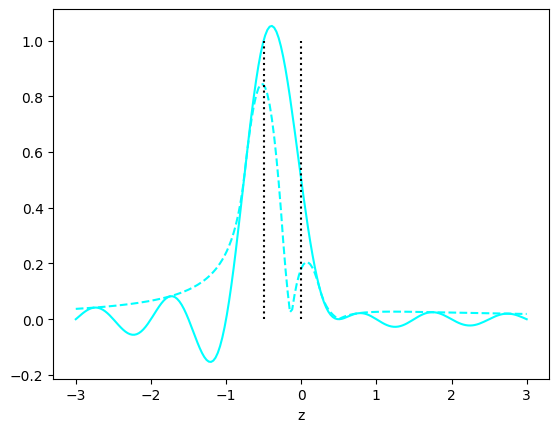

In [41]:
tailGrid = tuple(abs(p - m) for (p,m) in zip(tailGridP, tailGridM))
plot.plot(zGrid,tailGrid, '--', c=color2)

sincGrid = tuple(p + m for (p,m) in zip(sincGridP, sincGridM))
plot.plot(zGrid,sincGrid, c=color2)

# add decorations
yRange = ax.get_ylim()
plot.plot([-h,-h], yRange, ':', c='black')
plot.plot([0 for _ in range(2)], yRange, ':', c='black')

plot.xlabel('z')

#### Check InterpZ0

In [42]:
approx = SincApprox(-1/2, 1/2, 3, (1,1/2,0), map_)

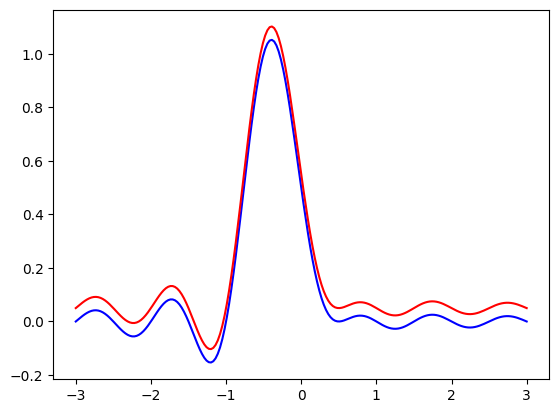

In [43]:
interpGrid = approx.InterpZ1(zGrid)
plot.plot(zGrid,interpGrid, c='blue')

sincShift = tuple(v + 0.05 for v in sincGrid)
plot.plot(zGrid,sincShift, c='red')

### Check Env function

In [44]:
def Env(z, sincApprox):
	h = sincApprox.h
	nSinc = sincApprox.nSinc
	sincZ = sincApprox.sincZ
	sincV = sincApprox.sincV
	
	temp = tuple((-1)**k * sincV[k] * TailEnv(z,sincZ[k],h) for k in range(nSinc))
	result = abs(sum(temp))
	
	return result

Text(0.5, 0, 'z')

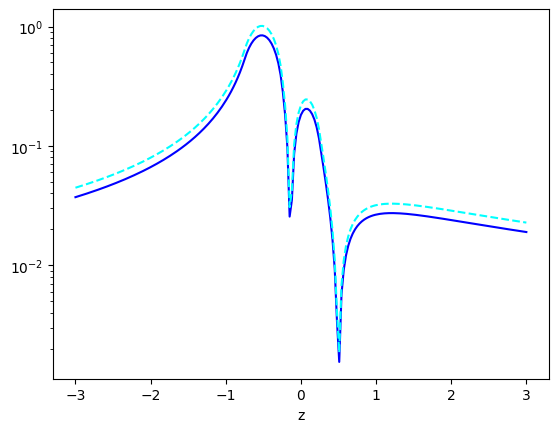

In [47]:
envGrid = tuple(Env(z, approx) for z in zGrid)
plot.semilogy(zGrid,envGrid, c='blue')

tailShift = tuple(v * 1.2 for v in tailGrid)
plot.semilogy(zGrid,tailShift, '--', c=color2)

plot.xlabel('z')

### Check function in the Sinc library file

(0.001, 1)

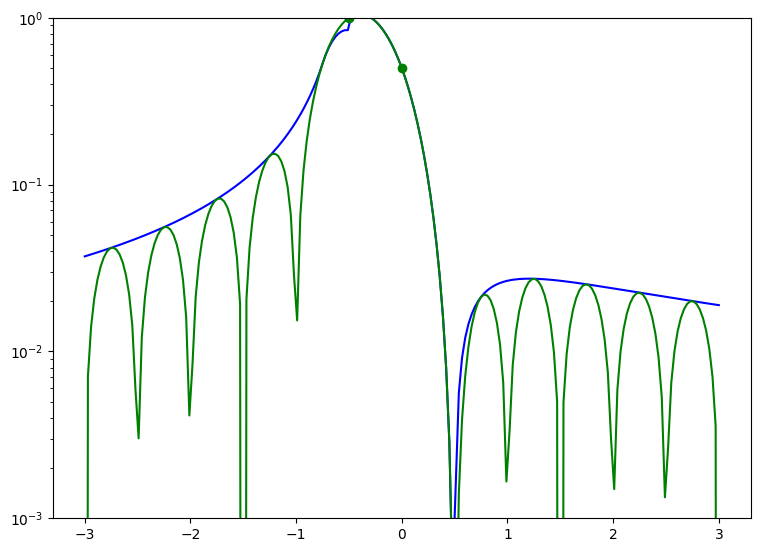

In [48]:
fig,ax = plot.subplots(figsize=(9,6.5))
libEnvGrid = tuple(approx.EnvZ(z) for z in zGrid)
plot.semilogy(zGrid, libEnvGrid, c='blue')

plot.semilogy(approx.sincZ, approx.sincV, 'o', c='green')

interp = approx.InterpZ1(zGrid)
interpAbs = tuple(abs(v) for v in interp)
plot.semilogy(zGrid,interpAbs, c='green')

ax.set_ylim(1e-3,1)